# **Load the Dataset**

In [18]:
import pandas as pd
df = pd.read_parquet("/content/train.parquet")

In [47]:
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


**Extract month from the 'Date' column**

In [48]:
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')


**Find the prescription count in TARGET DRUG PATIENT**

In [49]:
trgt_df = df[df['Incident'] == 'TARGET DRUG']

**Count the no of prescription values for each patient**

In [56]:
prescription_pattern = trgt_df.groupby(['Patient-Uid', 'Month']).size().reset_index(name='Prescriptions')

# Sort the data by patient and month
prescription_pattern.sort_values(by=['Patient-Uid', 'Month'], inplace=True)


In [57]:
prescription_pattern

,Patient-Uid,Month,Prescriptions
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07,1
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08,1
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09,1
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04,1
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05,1
...,...,...,...
59664,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08,1
59665,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07,1
59666,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06,1
59667,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07,1


In [58]:
prescription_pattern['Prescriptions'].value_counts()

1     54226
2      4355
3       658
4       217
5        82
6        54
7        26
8        18
10       10
9         8
13        4
11        4
18        2
12        2
14        1
17        1
21        1
Name: Prescriptions, dtype: int64

**PLOT IN HISTPLOT TO INFER THE FREQUENCY DISTRIBUTION**

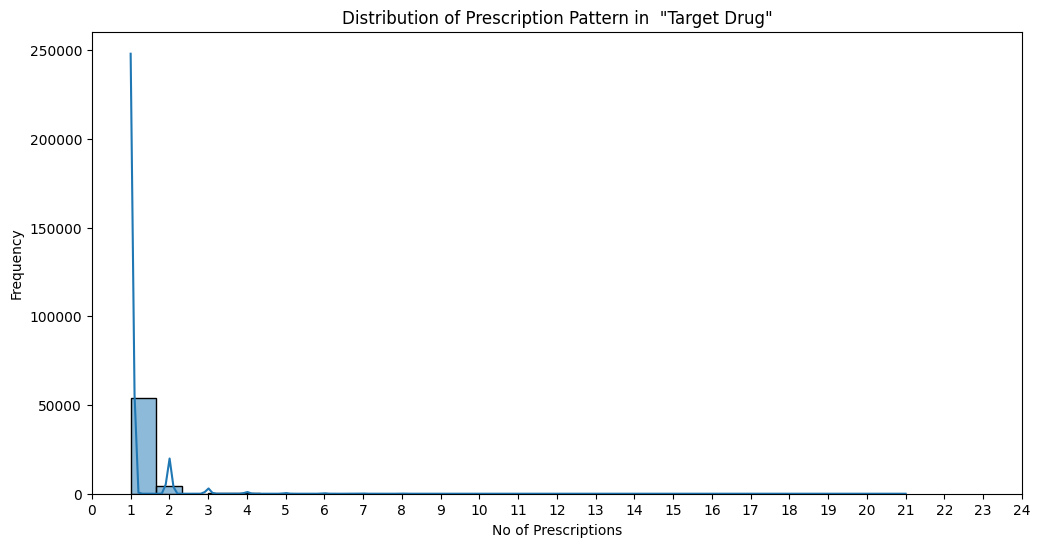

In [59]:

plt.figure(figsize=(12, 6))
sns.histplot(prescription_pattern['Prescriptions'], bins=30, kde=True)
plt.xlabel('No of Prescriptions')
plt.xticks(range(0,25))
plt.ylabel('Frequency')
plt.title('Distribution of Prescription Pattern in  "Target Drug"')
plt.show()

**TO INFER THE NO OF PRESCRIPTION PER MONTH USING VIOLINPLOT**

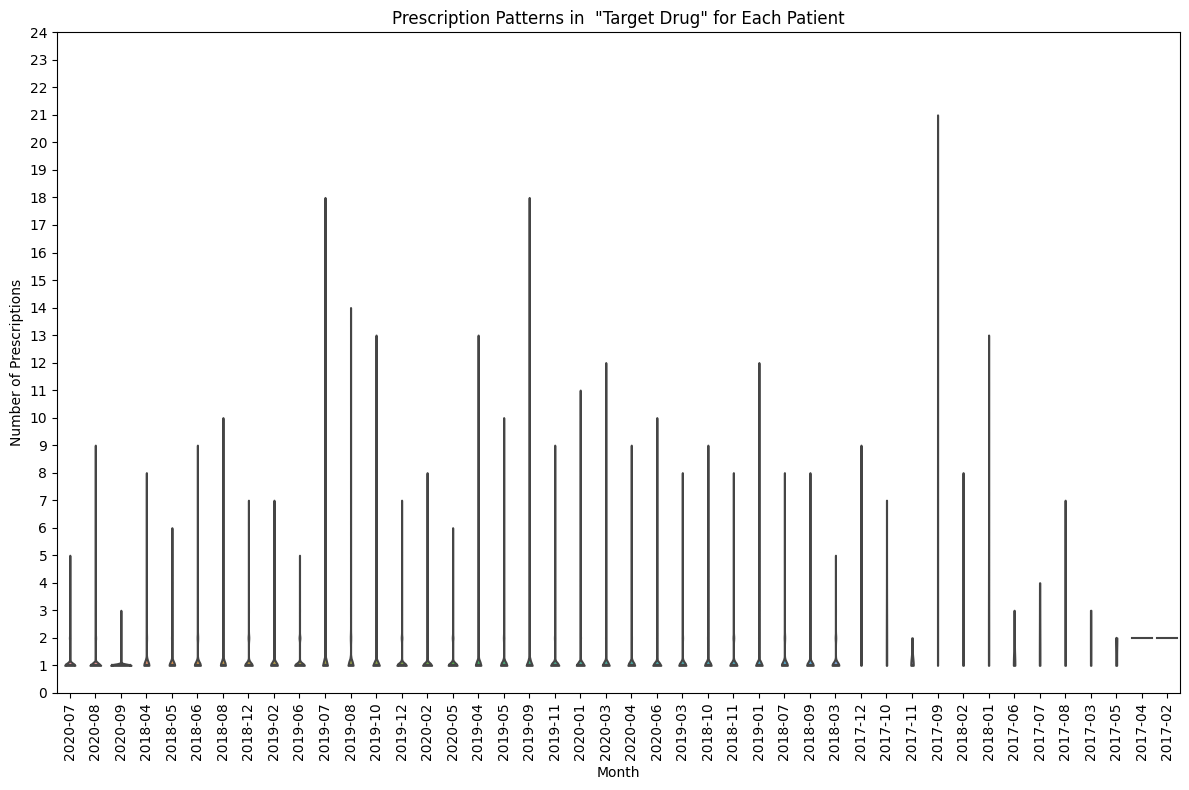

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the prescription patterns using a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Month', y='Prescriptions', data=prescription_pattern, inner='quart', cut=0)
plt.xlabel('Month')
plt.ylabel('Number of Prescriptions')
plt.title('Prescription Patterns in  "Target Drug" for Each Patient')
plt.xticks(rotation=90)
plt.yticks(range(0,25))

plt.tight_layout()
plt.show()


**INFERENCE :**
 **It shows the no of prescription in a month for each patient.In the month of Sep 2017, it has recorded the highest no of Prescription.**